## 探索电影数据集

在这个项目中，你将尝试使用所学的知识，使用 `NumPy`、`Pandas`、`matplotlib`、`seaborn` 库中的函数，来对电影数据集进行探索。

下载数据集：
[TMDb电影数据](https://s3.cn-north-1.amazonaws.com.cn/static-documents/nd101/explore+dataset/tmdb-movies.csv)



数据集各列名称的含义：
<table>
<thead><tr><th>列名称</th><th>id</th><th>imdb_id</th><th>popularity</th><th>budget</th><th>revenue</th><th>original_title</th><th>cast</th><th>homepage</th><th>director</th><th>tagline</th><th>keywords</th><th>overview</th><th>runtime</th><th>genres</th><th>production_companies</th><th>release_date</th><th>vote_count</th><th>vote_average</th><th>release_year</th><th>budget_adj</th><th>revenue_adj</th></tr></thead><tbody>
 <tr><td>含义</td><td>编号</td><td>IMDB 编号</td><td>知名度</td><td>预算</td><td>票房</td><td>名称</td><td>主演</td><td>网站</td><td>导演</td><td>宣传词</td><td>关键词</td><td>简介</td><td>时常</td><td>类别</td><td>发行公司</td><td>发行日期</td><td>投票总数</td><td>投票均值</td><td>发行年份</td><td>预算（调整后）</td><td>票房（调整后）</td></tr>
</tbody></table>


**请注意，你需要提交该报告导出的 `.html`、`.ipynb` 以及 `.py` 文件。**



---

---

## 第一节 数据的导入与处理

在这一部分，你需要编写代码，使用 Pandas 读取数据，并进行预处理。


**任务1.1：** 导入库以及数据

1. 载入需要的库 `NumPy`、`Pandas`、`matplotlib`、`seaborn`。
2. 利用 `Pandas` 库，读取 `tmdb-movies.csv` 中的数据，保存为 `movie_data`。

提示：记得使用 notebook 中的魔法指令 `%matplotlib inline`，否则会导致你接下来无法打印出图像。

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb
import csv
import copy

%matplotlib inline

movie_data=pd.read_csv('./tmdb-movies.csv')

---

**任务1.2: ** 了解数据

你会接触到各种各样的数据表，因此在读取之后，我们有必要通过一些简单的方法，来了解我们数据表是什么样子的。

1. 获取数据表的行列，并打印。
2. 使用 `.head()`、`.tail()`、`.sample()` 方法，观察、了解数据表的情况。
3. 使用 `.dtypes` 属性，来查看各列数据的数据类型。
4. 使用 `isnull()` 配合 `.any()` 等方法，来查看各列是否存在空值。
5. 使用 `.describe()` 方法，看看数据表中数值型的数据是怎么分布的。



In [2]:
print(movie_data.shape)
movie_data.head()
movie_data.tail()
movie_data.sample(5)
movie_data.dtypes
movie_data.isnull().any(axis=0)
movie_data.isnull().any(axis=1)
movie_data.describe()

(10866, 21)


,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


---

**任务1.3: ** 清理数据

在真实的工作场景中，数据处理往往是最为费时费力的环节。但是幸运的是，我们提供给大家的 tmdb 数据集非常的「干净」，不需要大家做特别多的数据清洗以及处理工作。在这一步中，你的核心的工作主要是对数据表中的空值进行处理。你可以使用 `.fillna()` 来填补空值，当然也可以使用 `.dropna()` 来丢弃数据表中包含空值的某些行或者列。

任务：使用适当的方法来清理空值，并将得到的数据保存。

In [3]:
movie_data1=copy.deepcopy(movie_data) #dropna
movie_data2=copy.deepcopy(movie_data) #fillna，方法：数字类型列用“0”替换，其他列用“”（空文本字符）替换
movie_data1=movie_data1.dropna()
for col in movie_data2:
    if movie_data2[col].dtypes==int or movie_data2[col].dtypes==float:
        movie_data2[col]=movie_data2[col].fillna(value=0)
    else:
        movie_data2[col]=movie_data2[col].fillna(value='')
        
'''
print(movie_data.isnull().any(axis=0))
print(movie_data.shape)
print("\n")
print(movie_data1.isnull().any(axis=0))
print(movie_data1.shape)
print("\n")
print(movie_data2.isnull().any(axis=0))
print(movie_data2.shape)
print("\n")
'''


'\nprint(movie_data.isnull().any(axis=0))\nprint(movie_data.shape)\nprint("\n")\nprint(movie_data1.isnull().any(axis=0))\nprint(movie_data1.shape)\nprint("\n")\nprint(movie_data2.isnull().any(axis=0))\nprint(movie_data2.shape)\nprint("\n")\n'

---

---

## 第二节 根据指定要求读取数据


相比 Excel 等数据分析软件，Pandas 的一大特长在于，能够轻松地基于复杂的逻辑选择合适的数据。因此，如何根据指定的要求，从数据表当获取适当的数据，是使用 Pandas 中非常重要的技能，也是本节重点考察大家的内容。



---

**任务2.1: ** 简单读取

1. 读取数据表中名为 `id`、`popularity`、`budget`、`runtime`、`vote_average` 列的数据。
2. 读取数据表中前1～20行以及48、49行的数据。
3. 读取数据表中第50～60行的 `popularity` 那一列的数据。

要求：每一个语句只能用一行代码实现。

In [4]:
#以下数据全部基于movie_data2
print(movie_data2.head())
movie_data_col_sel=movie_data2[['id','popularity','budget','runtime','vote_average']]
movie_data_row_sel=pd.concat([movie_data2[0:20],movie_data2[47:49]])
movie_data_row_col_sel=movie_data2[49:60][['popularity']]

       id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      

---

**任务2.2: **逻辑读取（Logical Indexing）

1. 读取数据表中 **`popularity` 大于5** 的所有数据。
2. 读取数据表中 **`popularity` 大于5** 的所有数据且**发行年份在1996年之后**的所有数据。

提示：Pandas 中的逻辑运算符如 `&`、`|`，分别代表`且`以及`或`。

要求：请使用 Logical Indexing实现。

In [5]:
movie_data2.loc[movie_data2['popularity']>5]
movie_data2.loc[(movie_data2['popularity']>5) & (movie_data2['release_year']>1996)]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

---

**任务2.3: **分组读取

1. 对 `release_year` 进行分组，使用 [`.agg`](http://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.core.groupby.DataFrameGroupBy.agg.html) 获得 `revenue` 的均值。
2. 对 `director` 进行分组，使用 [`.agg`](http://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.core.groupby.DataFrameGroupBy.agg.html) 获得 `popularity` 的均值，从高到低排列。

要求：使用 `Groupby` 命令实现。

In [6]:
num_agg=['mean']
movie_data_year=movie_data2.groupby('release_year')['revenue'].agg(num_agg)
movie_data_director=movie_data2.groupby('director')['popularity'].agg(num_agg)
movie_data_director
movie_data_director.sort_values('mean',ascending=False)

,mean
director,
Colin Trevorrow,16.696886
Joe Russo|Anthony Russo,12.971027
Chad Stahelski|David Leitch,11.422751
Don Hall|Chris Williams,8.691294
Juno John Lee,8.411577
Kyle Balda|Pierre Coffin,7.404165
Alan Taylor,6.883129
Peter Richardson,6.668990
Pete Docter,6.326804


---

---

## 第三节 绘图与可视化

接着你要尝试对你的数据进行图像的绘制以及可视化。这一节最重要的是，你能够选择合适的图像，对特定的可视化目标进行可视化。所谓可视化的目标，是你希望从可视化的过程中，观察到怎样的信息以及变化。例如，观察票房随着时间的变化、哪个导演最受欢迎等。

<table>
<thead><tr><th>可视化的目标</th><th>可以使用的图像</th></tr></thead><tbody>
 <tr><td>表示某一属性数据的分布</td><td>饼图、直方图、散点图</td></tr>
 <tr><td>表示某一属性数据随着某一个变量变化</td><td>条形图、折线图、热力图</td></tr>
 <tr><td>比较多个属性的数据之间的关系</td><td>散点图、小提琴图、堆积条形图、堆积折线图</td></tr>
</tbody></table>

在这个部分，你需要根据题目中问题，选择适当的可视化图像进行绘制，并进行相应的分析。对于选做题，他们具有一定的难度，你可以尝试挑战一下～

**任务3.1：**对 `popularity` 最高的20名电影绘制其 `popularity` 值。

<BarContainer object of 20 artists>

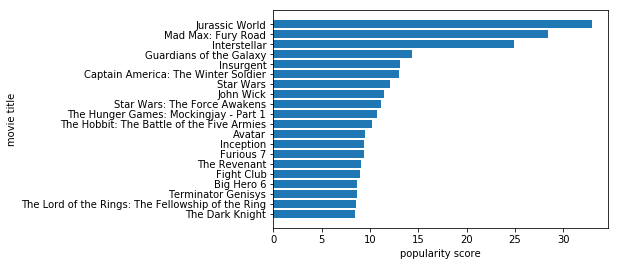

In [7]:
movie_data_top20pop=movie_data2.sort_values('popularity',ascending=False)[:20]
movie_data_top20pop=movie_data_top20pop.sort_values('popularity')
#plt.figure(figsize=(5,5))
plt.xlabel('popularity score')
plt.ylabel('movie title')
plt.barh(data=movie_data_top20pop,width='popularity',y='original_title')

---
**任务3.2：**分析电影净利润（票房-成本）随着年份变化的情况，并简单进行分析。

release_year
1960    3.842127e+06
1961    9.405909e+06
1962    5.026804e+06
1963    3.355103e+06
1964    7.178539e+06
1965    1.108219e+07
1966    5.909106e+05
1967    1.592956e+07
1968    4.943435e+06
1969    6.510580e+06
1970    1.056720e+07
1971    5.980247e+06
1972    1.146127e+07
1973    2.106891e+07
1974    1.565042e+07
1975    2.048207e+07
1976    1.444374e+07
1977    3.542111e+07
1978    1.785819e+07
1979    2.508738e+07
1980    1.802772e+07
1981    1.708352e+07
1982    2.494628e+07
1983    2.235527e+07
1984    1.815536e+07
1985    1.951424e+07
1986    1.899376e+07
1987    2.202119e+07
1988    1.940830e+07
1989    2.981947e+07
1990    3.049428e+07
1991    2.436366e+07
1992    3.486006e+07
1993    2.907597e+07
1994    2.644686e+07
1995    3.594547e+07
1996    2.266887e+07
1997    3.075045e+07
1998    2.377864e+07
1999    2.495749e+07
2000    2.302203e+07
2001    3.209975e+07
2002    3.289090e+07
2003    3.166685e+07
2004    3.134685e+07
2005    2.520206e+07
2006    2.198420e+07


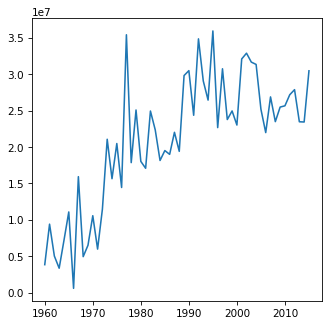

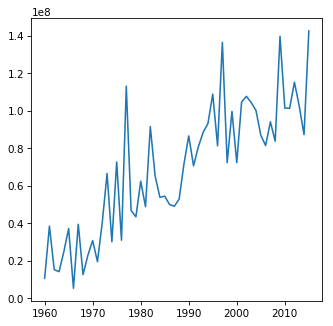

In [38]:
#生成分析数据集
movie_data_profit=movie_data2
movie_data_profit['profit']=movie_data_profit['revenue']-movie_data_profit['budget']
num_agg=['count','mean','std']
movie_data_profit_gb_year=movie_data_profit.groupby('release_year')['keywords','profit','revenue','budget'].agg(num_agg)#语句1
#print(movie_data_profit_gb_year)
#print(movie_data_profit_gb_year.shape)
print(movie_data_profit_gb_year[('profit','mean')])#语句2
print(movie_data_profit_gb_year[('profit','std')])
print(movie_data_profit_gb_year.columns)

#使用分析数据集作图
#movie_data_profit_gb_year.plot(kind='barh', x=movie_data_profit_gb_year.index, y=('profit','mean'), legend=False)
fig1=plt.figure(num='fig1', figsize=(5,5), dpi=75, facecolor='#FFFFFF', edgecolor='#0000FF')
plt.plot(movie_data_profit_gb_year.index, movie_data_profit_gb_year[[('profit','mean')]])
fig2=plt.figure(num='fig2', figsize=(5,5), dpi=75, facecolor='#FFFFFF', edgecolor='#0000FF')
plt.plot(movie_data_profit_gb_year.index, movie_data_profit_gb_year[[('profit','std')]])

一、关于groupby+agg使用后，生成新的dataset的数据结构。
1、.agg方法会自动舍弃不符合聚合数据格式要求的数据。例如：语句1执行后，原dataset的‘keywords’列，没有包含在新dataset中。
2、新dataset的列为tuple，新dataframe列读取方法如语句2所示。

二、数据分析
1、电影平均利润的均值、方差都呈现逐渐上升的趋势，且高度正相关。
2、利润方差值普遍高于利润均值，可见不同电影的利润差异很大。

---

**[选做]任务3.3：**选择最多产的10位导演（电影数量最多的），绘制他们排行前3的三部电影的票房情况，并简要进行分析。

In [39]:
#筛选出top10导演
movie_data_director=movie_data2[['director']]
movie_data_count_of_director=movie_data_director.groupby(['director'],as_index=False)['director'].agg({'cnt':'count'})
movie_data_count_of_director_top10=movie_data_count_of_director.sort_values('cnt',ascending=False)[:10]
movie_data_count_of_director_top10



,director,cnt
5000,Woody Allen,45
0,,44
879,Clint Eastwood,34
3176,Martin Scorsese,29
4602,Steven Spielberg,29
4034,Ridley Scott,23
4601,Steven Soderbergh,22
4190,Ron Howard,22
2349,Joel Schumacher,21
577,Brian De Palma,20


---

**[选做]任务3.4：**分析1968年~2015年六月电影的数量的变化。

---

**[选做]任务3.5：**分析1968年~2015年六月电影 `Comedy` 和 `Drama` 两类电影的数量的变化。

> 注意: 当你写完了所有的代码，并且回答了所有的问题。你就可以把你的 iPython Notebook 导出成 HTML 文件。你可以在菜单栏，这样导出**File -> Download as -> HTML (.html)、Python (.py)** 把导出的 HTML、python文件 和这个 iPython notebook 一起提交给审阅者。